<a href="https://colab.research.google.com/github/gb08/Deep_learning_with_Colab/blob/master/DL_regressor_keras_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras  # tf.keras
import time

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [14]:
!ls /content/gdrive/My\ Drive/dl_reg_keras_api

ls: cannot access '/content/gdrive/My Drive/dl_reg_keras_api': No such file or directory


In [15]:
drive.mount('/content/gdrive')
#!ls gdrive/My\ Drive

model_path = '/content/gdrive/My\ Drive/dl_reg_keras_api'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%matplotlib inline
%load_ext tensorboard

Fetch Dataset

In [17]:

fetch_california_housing = fetch_california_housing()

In [0]:
X = fetch_california_housing.data
Y = fetch_california_housing.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4)

In [20]:
X.shape, X_train.shape, X_val.shape, X_test.shape

((20640, 8), (9907, 8), (6605, 8), (4128, 8))

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [0]:
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## FUNCTIONAL API ##

In [0]:
input_layer = keras.layers.Input(shape=(8,))

In [24]:
hidden1 = keras.layers.Dense(30, activation="relu")(input_layer) 
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
concat_layer = keras.layers.concatenate(inputs=[input_layer, hidden2]) 

In [0]:
output_layer = keras.layers.Dense(1)(concat_layer)

In [0]:
model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

In [0]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=(1e-3)), loss = "mean_squared_error")

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [30]:
history = model.fit(x=X_train_scaled, y=y_train, epochs=10, 
                    validation_data=(X_val_scaled, y_val))

Train on 9907 samples, validate on 6605 samples
Epoch 1/10
9907/9907 [==============================] - 6s 586us/sample - loss: 2.4327 - val_loss: 1.0041
Epoch 2/10
9907/9907 [==============================] - 1s 111us/sample - loss: 0.9226 - val_loss: 0.7807
Epoch 3/10
9907/9907 [==============================] - 1s 111us/sample - loss: 0.7430 - val_loss: 0.6899
Epoch 4/10
9907/9907 [==============================] - 1s 112us/sample - loss: 0.6785 - val_loss: 0.6415
Epoch 5/10
9907/9907 [==============================] - 1s 112us/sample - loss: 0.6382 - val_loss: 0.6065
Epoch 6/10
9907/9907 [==============================] - 1s 109us/sample - loss: 0.6076 - val_loss: 0.5818
Epoch 7/10
9907/9907 [==============================] - 1s 112us/sample - loss: 0.5844 - val_loss: 0.5620
Epoch 8/10
9907/9907 [==============================] - 1s 112us/sample - loss: 0.5652 - val_loss: 0.5454
Epoch 9/10
9907/9907 [==============================] - 1s 114us/sample - loss: 0.5485 - val_loss: 0.530

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

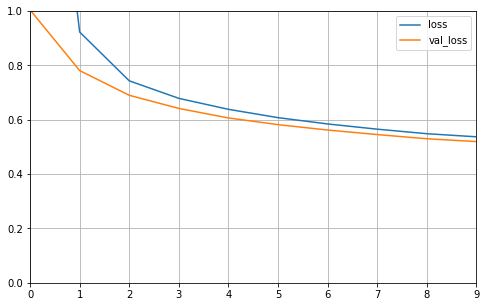

In [32]:
plot_learning_curves(history)

In [33]:
model.evaluate(x=X_test_scaled, y=y_test)

4128/4128 [==============================] - 0s 44us/sample - loss: 0.5415


0.5414569466844086

In [34]:
model.predict(X_test[1:10])

array([[118.37925 ],
       [224.2009  ],
       [472.54922 ],
       [ 84.209305],
       [117.81774 ],
       [226.45645 ],
       [168.8139  ],
       [125.441284],
       [162.72238 ]], dtype=float32)

In [35]:
!ls /content/gdrive/My\ Drive/

 Amazon_Review
 char_level_model_500_epoch.h5
 char_level_model.h5
'clean_data (1).csv'
'clean_data (2).csv'
 clean_data.csv
 cleaned_normalized_data.csv
'Colab Notebooks'
'CV_Gayatri_Bhoyar (1).docx'
'CV_Gayatri_Bhoyar (2).docx'
 CV_Gayatri_Bhoyar.docx
 CV_Gayatri_Bhoyar.gdoc
'CV_Gayatri Bhoyar Proficient Perl Developer.docx'
'CV_Gayatri Bhoyar Proficient Perl Developer.docx.gdoc'
 Data
 data-simplification.tar.bz2
 dictionary.pickle
 dl_reg_keras_api
 dl_reg-keras_api
 dress
 drug_dataset_cleaned.csv
'drugname_stopwords (1).csv'
'drugname_stopwords (2).csv'
 drugname_stopwords.csv
 drug_review_lstm_model_10.h5
 drug_review_lstm_model_1.h5
 drug_review_lstm_model_2.h5
 drug_review_lstm_model.json
 drug_review_lstm_model_weights_1.h5
 drug_review_lstm_model_weights_2.h5
 drug_review_lstm_model_weights.h5
'EAF India Recruitment_V6.2.gdoc'
 early_weights_char_level_500_epoch.hdf5
 en_model_lg
'Gayatri Bhoyar_CV.gdoc'
'Gayatri Bhoyar.gsheet'
 Gb
 lstm_model_2.h5
'New Doc 2017-11-04 (1)_1.

In [0]:
model.save('dl_reg_keras_func_api.h5')

## SUBCLASSING API ##

In [0]:
class MyModel(keras.models.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden1 = keras.layers.Dense(40, activation="relu")
        self.hidden2 = keras.layers.Dense(40, activation="relu")
        self.output_ = keras.layers.Dense(1)

    def call(self, input):
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output



In [0]:
model = MyModel()

In [0]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(1e-3))


In [41]:
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_val_scaled, y_val))

Train on 9907 samples, validate on 6605 samples
Epoch 1/10
9907/9907 [==============================] - 1s 119us/sample - loss: 2.3165 - val_loss: 0.8748
Epoch 2/10
9907/9907 [==============================] - 1s 112us/sample - loss: 0.7751 - val_loss: 0.7206
Epoch 3/10
9907/9907 [==============================] - 1s 107us/sample - loss: 0.6887 - val_loss: 0.6627
Epoch 4/10
9907/9907 [==============================] - 1s 107us/sample - loss: 0.6440 - val_loss: 0.6255
Epoch 5/10
9907/9907 [==============================] - 1s 110us/sample - loss: 0.6132 - val_loss: 0.5975
Epoch 6/10
9907/9907 [==============================] - 1s 109us/sample - loss: 0.5886 - val_loss: 0.5747
Epoch 7/10
9907/9907 [==============================] - 1s 109us/sample - loss: 0.5699 - val_loss: 0.5575
Epoch 8/10
9907/9907 [==============================] - 1s 107us/sample - loss: 0.5536 - val_loss: 0.5446
Epoch 9/10
9907/9907 [==============================] - 1s 109us/sample - loss: 0.5393 - val_loss: 0.530

In [42]:
model.summary()


Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  360       
_________________________________________________________________
dense_4 (Dense)              multiple                  1640      
_________________________________________________________________
dense_5 (Dense)              multiple                  49        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.evaluate(X_test_scaled, y_test)


4128/4128 [==============================] - 0s 45us/sample - loss: 0.5380


0.5380092978246452

In [45]:
model.save('dl_reg_keras_succl_api', save_format='tf')

INFO:tensorflow:Assets written to: dl_reg_keras_succl_api/assets
